In [1]:
pip install --upgrade tensorflow==2.0.0-beta1

  Using cached https://files.pythonhosted.org/packages/d3/c4/1f93387c61e75b3977a7ad533762f40d9b4741992bfa2ec8f13ecda0456f/tensorflow-2.0.0b1-cp37-cp37m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/32/dd/99c47dd007dcf10d63fd895611b063732646f23059c618a373e85019eb0e/tf_estimator_nightly-1.14.0.dev2019060501-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/96/571b875cd81dda9d5dfa1422a4f9d749e67c0a8d4f4f0b33a4e5f5f35e27/tb_nightly-1.14.0a20190603-py3-none-any.whl
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
print('tensorflow version', tf.__version__)

tensorflow version 2.0.0-beta1


# Importing

In [3]:
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
import numpy
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

/Users/laurens/opt/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/laurens/opt/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/laurens/opt/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lauren

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import backend as K

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

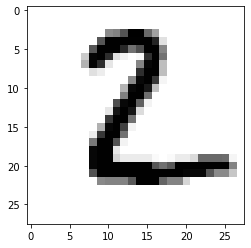

In [7]:
plt.imshow(X_test[1], cmap = plt.cm.binary)
plt.show()

In [8]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Building a simple network

In [9]:
ELU=tf.keras.layers.ELU(alpha=1.0)
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128))
model.add(ELU)
model.add(layers.Dense(128))
model.add(ELU)
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
elu (ELU)                    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3233 - accuracy: 0.9054 - val_loss: 0.1727 - val_accuracy: 0.9485
Epoch 2/10
54000/54000 [==============================] - 2s 38us/sample - loss: 0.1638 - accuracy: 0.9497 - val_loss: 0.1248 - val_accuracy: 0.9612
Epoch 3/10
54000/54000 [==============================] - 2s 38us/sample - loss: 0.1131 - accuracy: 0.9648 - val_loss: 0.1082 - val_accuracy: 0.9698
Epoch 4/10
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0866 - accuracy: 0.9727 - val_loss: 0.0929 - val_accuracy: 0.9715
Epoch 5/10
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0690 - accuracy: 0.9776 - val_loss: 0.0798 - val_accuracy: 0.9758
Epoch 6/10
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0549 - accuracy: 0.9822 - val

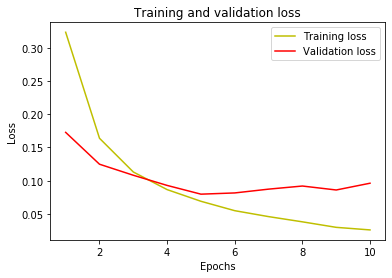

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

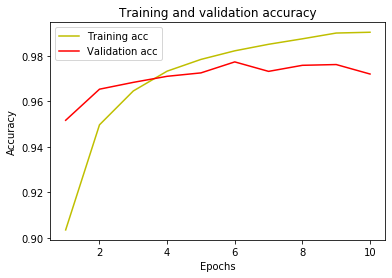

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1169 - accuracy: 0.9696


0.9696

# Implementing dropout

In [126]:
inputs = tf.keras.Input(shape=(28,28))
i = layers.Flatten(input_shape=(28, 28))(inputs)
d0=layers.Dropout(0.5)(i,training=True)
c1= layers.Dense(128)(d0)
d1=layers.Dropout(0.5)(c1,training=True)
a1=tf.keras.layers.ELU(alpha=1.0)(c1)
c2=layers.Dense(128)(a1)
d2=layers.Dropout(0.5)(c2,training=True)
a2=tf.keras.layers.ELU(alpha=1.0)(d2)
c2=layers.Dense(10)(a2)
outputs=layers.Activation('softmax')(c2)
model_dropout = tf.keras.Model(inputs, outputs)
model_dropout.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
elu_6 (ELU)                  (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0   

In [127]:
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [128]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 61us/sample - loss: 0.5561 - accuracy: 0.8268 - val_loss: 0.3472 - val_accuracy: 0.8943
Epoch 2/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3716 - accuracy: 0.8841 - val_loss: 0.2848 - val_accuracy: 0.9070
Epoch 3/10
54000/54000 [==============================] - 2s 43us/sample - loss: 0.3055 - accuracy: 0.9039 - val_loss: 0.2482 - val_accuracy: 0.9208
Epoch 4/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.2661 - accuracy: 0.9166 - val_loss: 0.2368 - val_accuracy: 0.9237
Epoch 5/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.2449 - accuracy: 0.9231 - val_loss: 0.1979 - val_accuracy: 0.9403
Epoch 6/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.2196 - accuracy: 0.9314 - val_loss: 0.1872 - val_accuracy: 0.9413
Epoch 7/10
54000/54000 [==============================] -

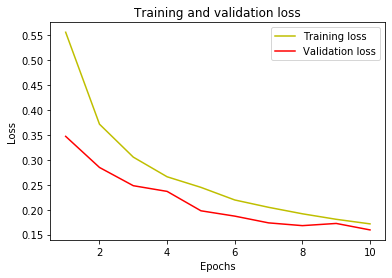

In [129]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

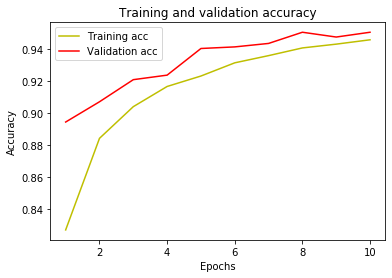

In [130]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [131]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1818 - accuracy: 0.9430


0.943

In [132]:
B=100
a=model_dropout.predict(X_test)
d=[]
for i in range(1,B):
    l=model_dropout.predict(X_test)
    d.append(l)

In [133]:
mean=np.average(d,axis=0)
var=np.var(d,axis=0)

[2.29905072e-06 9.99253690e-01 1.51207598e-04 1.11809313e-04
 5.68295909e-05 3.13212004e-05 8.02452778e-05 2.08543293e-04
 9.22213294e-05 1.18755215e-05] [9.3342996e-06 1.7378975e-03 5.5662630e-04 3.1201853e-04 1.3813423e-04
 1.8820746e-04 4.3344521e-04 7.4818160e-04 2.6112338e-04 5.9123649e-05]


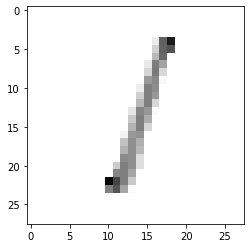

In [137]:
print(mean[2],np.sqrt(var[2]))
plt.imshow(X_test[2], cmap = plt.cm.binary)
plt.show()

# Fixing softmax

## Importing stuff

In [4]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras import losses
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.models import Sequential
import numpy
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

## Using a mulitomial distribution

In [308]:
batch_size=100
ELU=tf.keras.layers.ELU(alpha=1.0)
model4 = tf.keras.Sequential()
model4.add(layers.Flatten(input_shape=(28, 28)))
model4.add(layers.Dense(128))
model4.add(ELU)
model4.add(layers.Dense(128))
model4.add(ELU)
model4.add(layers.Dense(10))
model4.add(layers.Activation('softmax'))
model4.add(tfp.layers.DistributionLambda(
      lambda t: tfd.Multinomial(probs=t[..., 0:],total_count=1)))
model4.summary()


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_50 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_150 (Dense)            (None, 128)               100480    
_________________________________________________________________
elu_50 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_152 (Dense)            (None, 10)                1290      
_________________________________________________________________
activation_50 (Activation)   (None, 10)                0         
_________________________________________________________________
distribution_lambda_49 (Dist ((None, 10), (None, 10))

In [411]:
negloglik = lambda y, distribution: -distribution.log_prob(y)

In [412]:
model4.compile(loss=negloglik,
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [413]:
model4.fit(
    X_train,
    y_train,
    epochs=1,
    batch_size=batch_size,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - 3s 59us/sample - loss: 0.2126 - mean_absolute_error: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.1585 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 0.0167


In [359]:
Randomoutput=model4(X_test[1:2])

In [410]:
print(np.round(Randomoutput.mean().numpy(),3)[0],'average outcome')
print(np.round(Randomoutput.stddev().numpy(),3)[0],'standdarddeviation')

[0.    0.001 0.989 0.003 0.    0.007 0.    0.    0.    0.   ] average outcome
[0.009 0.029 0.106 0.057 0.    0.081 0.022 0.    0.011 0.   ] standdarddeviation


## Using a Categorical distribution (does not work yet)

In [355]:
batch_size=150
ELU=tf.keras.layers.ELU(alpha=1.0)
model5 = tf.keras.Sequential()
model5.add(layers.Flatten(input_shape=(28, 28)))
model5.add(layers.Dense(128))
model5.add(ELU)
model5.add(layers.Dense(128))
model5.add(ELU)
model5.add(layers.Dense(10))
model5.add(layers.Activation('softmax'))
model5.add(tfp.layers.DistributionLambda(
      lambda t: tfd.Categorical(probs=[t[0:10]])))
model5.summary()



TypeError: in converted code:

    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow_probability/python/layers/distribution_layer.py:211 call  *
        distribution, value = super(DistributionLambda, self).call(
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py:785 call
        return self.function(inputs, **arguments)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow_probability/python/layers/distribution_layer.py:160 _fn
        d = make_distribution_fn(*fargs, **fkwargs)
    <ipython-input-355-636f908ff983>:12 <lambda>
        lambda t: tfd.Categorical(probs=[...,t[0:10]])))
    </anaconda3/envs/Tensorflow/lib/python3.7/site-packages/decorator.py:decorator-gen-183>:2 __init__
        
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow_probability/python/distributions/distribution.py:274 wrapped_init
        default_init(self_, *args, **kwargs)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow_probability/python/distributions/categorical.py:189 __init__
        name=name)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow_probability/python/internal/distribution_util.py:813 get_logits_and_probs
        probs = tf.convert_to_tensor(value=probs, name="probs", dtype=dtype)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1158 convert_to_tensor_v2
        as_ref=False)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1237 internal_convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1131 _autopacking_conversion_function
        return _autopacking_helper(v, dtype, name or "packed")
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1080 _autopacking_helper
        constant_op.constant(elem, dtype=dtype, name=str(i)))
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/constant_op.py:246 constant
        allow_broadcast=True)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/constant_op.py:284 _constant_impl
        allow_broadcast=allow_broadcast))
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:467 make_tensor_proto
        _AssertCompatible(values, dtype)
    /anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:372 _AssertCompatible
        (dtype.name, repr(mismatch), type(mismatch).__name__))

    TypeError: Expected float32, got Ellipsis of type 'ellipsis' instead.


In [348]:
model5.compile(loss=negloglik,
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [353]:
model5.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=batch_size,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 15us/sample - loss: 0.3253 - mean_absolute_error: 0.1851 - mean_squared_error: 0.1851 - val_loss: 0.3251 - val_mean_absolute_error: 0.1641 - val_mean_squared_error: 0.1641
Epoch 2/5
54000/54000 [==============================] - 1s 14us/sample - loss: 0.3253 - mean_absolute_error: 0.1776 - mean_squared_error: 0.1776 - val_loss: 0.3252 - val_mean_absolute_error: 0.1744 - val_mean_squared_error: 0.1744
Epoch 3/5
54000/54000 [==============================] - 1s 14us/sample - loss: 0.3253 - mean_absolute_error: 0.1794 - mean_squared_error: 0.1794 - val_loss: 0.3252 - val_mean_absolute_error: 0.1598 - val_mean_squared_error: 0.1598
Epoch 4/5
54000/54000 [==============================] - 1s 14us/sample - loss: 0.3253 - mean_absolute_error: 0.1921 - mean_squared_error: 0.1921 - val_loss: 0.3253 - val_mean_absolute_error: 0.1770 - val_mean_squared_error: 0.1770
Epoch 5/5
54000/54000 [